# **Laboratorijska vježba 3**: Opisivanje podataka

> Opisivanje podataka treći je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. U sklopu ovog koraka provodi se rudarenje, grupiranje, modeliranje te sažimanje podataka. Ovaj korak podrazumijeva uzimanje pripremljenih podataka i pronalaženje određenih obrazaca, raspona i pristranosti u njima s ciljem utvrđivanja njihove korisnosti u kasnijoj fazi analize. 


> U ovoj laboratorijskoj vježbi upoznat ćemo se s korakom opisivanja podataka te pozabaviti s izračunavanjem deskriptivne  i inferencijalne statistike. U tu svrhu korist ćemo biblioteke statsmodels i SciPy koje olakšavaju statističku analizu skupova podataka. 

---

# **Opisivanje podataka**

Dvije dobro poznate vrste statističkih tehnika koje se koriste za opisivanje i analizu podataka jesu **deskriptivna** i **inferencijalna statistika**. U okviru deskriptivne statistike, skup podataka obično se opisuje:
*   osnovnim mjerama deskriptivne statistike i
*   kvantificiranjem veza između pojedinih varijabli u skupu podataka. 

S druge strane, provođenje inferencijalne statistike podrazumijeva izvođenje zaključaka i predviđanja na temelju podataka, kao i kvantificiranje nesigurnosti oko tih zaključaka i predviđanja. U okviru inferencijalne statistike, obično se provodi:

*  testiranje hipoteza, 
*  procjena intervala pouzdanosti,
*  regresijska analiza te
*  opservacijske studije.

# **Deskriptivna statistika**

Deskriptivna statistika u osnovi opisuje podatke pomoću **mjera središnje tendencije**, **mjera varijabilnosti** te **distribucije učestalosti**. Mjere središnje tendencije uključuju **srednju vrijednost, medijan i mod**, dok mjere varijabilnosti uključuju **standardnu devijaciju**, **varijancu**, **minimalne** i **maksimalne** vrijednosti, **zaobljenost** (engl. *kurtosis*) te **asimetriju** (engl. *skewness*). Mjera distribucije učestalosti opisuje učestalost podataka unutar skupa podataka (*count*).

Podaci mogu biti kvantitativni i kvalitativni. Kvantitativni podaci su u **numeričkom** obliku, koji može biti **diskretan** ili **kontinuirani**. Kvalitativni podaci nisu numerički te mogu biti **nominalni** i **redni**. Pri tome, nominalni podaci ne sadrže nikakav redoslijed (primjerice, spol ili bračni status), dok redni podaci imaju određen redoslijed (primjerice, ocjena filma, veličina majice,...). Da bismo opisali i analizirali podatke, potrebno je znati njihovu prirodu budući da ona utječe na to koju vrstu analize možemo na njima provesti.

Izračun deskriptivne statistike jednostavno je provesti pomoću metode *describe()* iz biblioteke Pandas koja vraća neke mjere središnje tendencije, mjere varijabilnosti te mjeru distribucije učestalosti za stupce s numeričkim vrijednostima u skupu podataka.

In [ ]:
import pandas as pd
import numpy as np

# Učitavanje statističkih biblioteka
from statsmodels.stats import diagnostic
from scipy import stats

In [ ]:
data = pd.DataFrame({'age': [18, 19, 20, 21, 20, 88, 35, 18, 29, 21, 25, 45, 65, 18, 33],
                     'city': ['OS', 'ZG', 'OS', 'ST', 'RI', 'ZG', 'RI', 'ST', 'OS', 'ZG', 'ZG', 'OS', 'ST', 'RI', 'OS'],
                     'name': ['Marko', 'Iva', 'Ana', 'Pero', 'Luka', 'Šimun', 'Marija', 'Josip', 'Bruno', 'Margareta', 'Zlatko', 'Filip', 'Davor', 'Matej', 'Mateo'],
                     'height': [150, 188, 202, 190, 167, 155, 175, 170, 185, 182, 203, 158, 163, 179, 189],
                     'grade': [2, 4, 5, 3, 4, 3, 2, 3, 4, 3, 5, 4, 3, 3, 3]})
data.describe()

Često se kaže da je statistika **robusna** ako nije osjetljiva na stršeće vrijednosti (*outliers*). Tako najmanja, najveća, srednja vrijednost te standardna devijacija nisu robustne, dok su medijan i kvartili robustnije statičke mjere. 

In [ ]:
data.median()

## **Kvantificiranje veza između dviju varijabli**

U kontekstu izračuna deskriptivne statistike, važan je faktor broj varijabli koji analiziramo. U deskriptivnoj statistici, univarijantna analiza podrazumijeva opisivanje jedne varijable ranije navedenim mjerama. Kada skup podataka sadrži više varijabli (što je uobičajeno), deskriptivna statistika može se koristiti za opisivanje odnosa između parova varijabli. U ovom slučaju deskriptivna statistika uključuje izvođenje dodatnih metoda kao što su:

*   **Unakrsne tablice** (engl. *cross-tabulations*) (još se nazivaju tablice kontigencije)
*   **Grafički prikaz varijabli pomoću dijagrama raspršenosti**
*   **Kvantitativne mjere korelacije**. 

Tablice kontigencije u biblioteci pandas jednostavno se izvode pomoću metode *crosstab()*. Dijagram raspršenosti moguće je nacrtati pomoću pripadnih funkcija u bibliotekama pandas, matplotlib ili seaborn. Također, mjere korelacije mogu se izračunati pomoću prikladnih funkcija iz biblioteke pandas ili scipy. Jedne od najpoznatijih mjera korelacije jesu Pearsonova i Spearmanova korelacija. Pearsonov koeficijent korelacije koristi se u slučajevima kada između varijabli postoji linearna povezanost te je njihova distribucija neprekidna. Vrijednost ovog koeficijenta kreće se od +1 (savršena pozitivna korelacija) do -1 (savršena negativna korelacija). Računa se usporedbom stvarnog utjecaja promatranih varijabli jedne na drugu u odnosu na maksimalni mogući utjecaj tih dviju varijabli:

$$r=\frac{SS_{XY}}{\sqrt{SS_{XX} \cdot SS_{YY}}}, $$

gdje je 

$$SS_{XX} = \sum_{i}^n (X_{i}-\bar{X})^2$$

suma kvadrata odstupanja vrijednosti varijable X od njezine prosječne vrijednosti, a 

$$SS_{YY} = \sum_{i}^n (Y_{i} - \bar{Y})^2$$

suma kvadrata odstupanja vrijednosti varijable Y od njezine prosječne vrijednosti. Suma umnožaka varijabli X i Y jednaka je sumi umnožaka odstupanja vrijednosti varijabli X i Y od njihovih prosjeka:

$$SS_{XY} = \sum (X_{i} - \bar{X})(Y_{i} - \bar{Y}).$$


Spearmanov koeficijent korelacije koristi se za mjerenje povezanosti između varijabli u slučaju kada nije moguće primijeniti Pearsonov koeficijent korelacije. Pearsonov koeficijent ispituje linearnu korelaciju, dok Spearmanov koeficijent ispituje monotonu relaciju (u smislu - kad se jedna varijabla poveća, poveća se i druga, no ne nužno linearno). Pearsonov koeficijent korelacije najprikladniji je za mjerenja uzeta s intervalne ljestvice (primjerice, temperatura, godine, duljina,...), dok je Spearmanov koeficijent prikladniji za mjerenja uzeta s ordinalne ljestvice (primjerice, ocjena). Pri izračunu ovog koeficijenta, vrijednosti varijabli potrebno je rangirati na način da se najmanjoj vrijednosti svake varijable pridjeli rang 1, sljedećoj rang 2 i tako do posljednje kojoj se pridjeljuje maksimalni rang. Izračunavanje koeficijenta radi se korištenjem vrijednosti pridjeljenih rangova:

$$r_{S} = 1 - 6 \sum_{i=1}^n \frac{d_{i}^2}{n(n^2-1)}, $$

gdje je d razlika vrijednosti rangova dvije promatrane varijable, a n je broj različitih serija.

Bitno je napomenuti da pri izračunu korelacije varijabli treba pripaziti na stršeće vrijednosti (*outliers*). One mogu znatno utjecati na vrijednosti koeficijenata korelacije pa treba razmisliti o tome da li ih je možda korisnije isključiti iz izračuna. Stršeće vrijednosti najlakše je primijetiti promatrajući dijagram raspršenosti ili dijagram pravokutnika. 

U biblioteci pandas, korelacija se računa pomoću metode corr() koja sadrži parametar *method* koji specificira računa li se Pearsonova (*pearson*), Spearmanova (*spearman*) ili Kendallova (*kendall*) korelacija. Moguće je pozvati metodu na cijelom skupu podataka te će ona vratiti matricu korelacija između svih numeričkih varijabli.

U biblioteci scipy, Pearsonova korelacija računa se funkcijom *pearsonr()*, a Spearmanova funkcijom *spearmanr()*.

In [ ]:
data.corr(method='pearson')

In [ ]:
data.corr(method='spearman')

In [ ]:
stats.pearsonr(data['age'], data['height'])

In [ ]:
stats.spearmanr(data['age'], data['grade'])

Kad govorimo o korelaciji, treba upozoriti na poznati **Simpsonov paradoks**. Ovaj paradoks opisuje pojavu u statistici kada se neki trend pojavljuje u nekoliko skupina podataka, ali nestaje ili se čak preokreće kada se skupine grupiraju. S obzirom na ovu pojavu, kod računanja korelacije pripazite na to želite li kvantificirati korelaciju između cijelih varijabli ili pak između pojedinih skupina unutar tih varijabli. Jedan od najpoznatijih primjera Simpsonova paradoksa je navodna rodna pristranost UC Berkleya [[6]](https://towardsdatascience.com/simpsons-paradox-and-interpreting-data-6a0443516765).

## **Ograničenja deskriptivne statistike**

Deskriptivna statistika daje sažeti uvid u podatke pomoću osnovnih statističkih mjera. Ipak, ne smijemo se bazirati samo na tim mjerama pri donošenju određenih zaključaka o podacima. Uz deskriptivnu statistiku, pri opisivanju podataka poželjno je provesti i eksploratornu analizu podataka koja sažima osnovne karakteristike skupa podataka upotrebom statističkih dijagrama i drugih metoda vizualizacije podataka. Ove metode su prikazane u prethodnoj laboratorijskoj vježbi (Vizualizacija podataka). 

Poznati problem koji naglašava ograničenja deskriptivne statistike te ujedno i važnost eksploratorne analize podataka jest **Anscombeov kvartet** (engl. *Anscombe’s quartet*). Ovaj kvartet se sastoji od četiri skupa podataka koji imaju identična deskriptivna statistička svojstva, ali imaju različite prikaze kada koristimo raspršeni dijagram. 

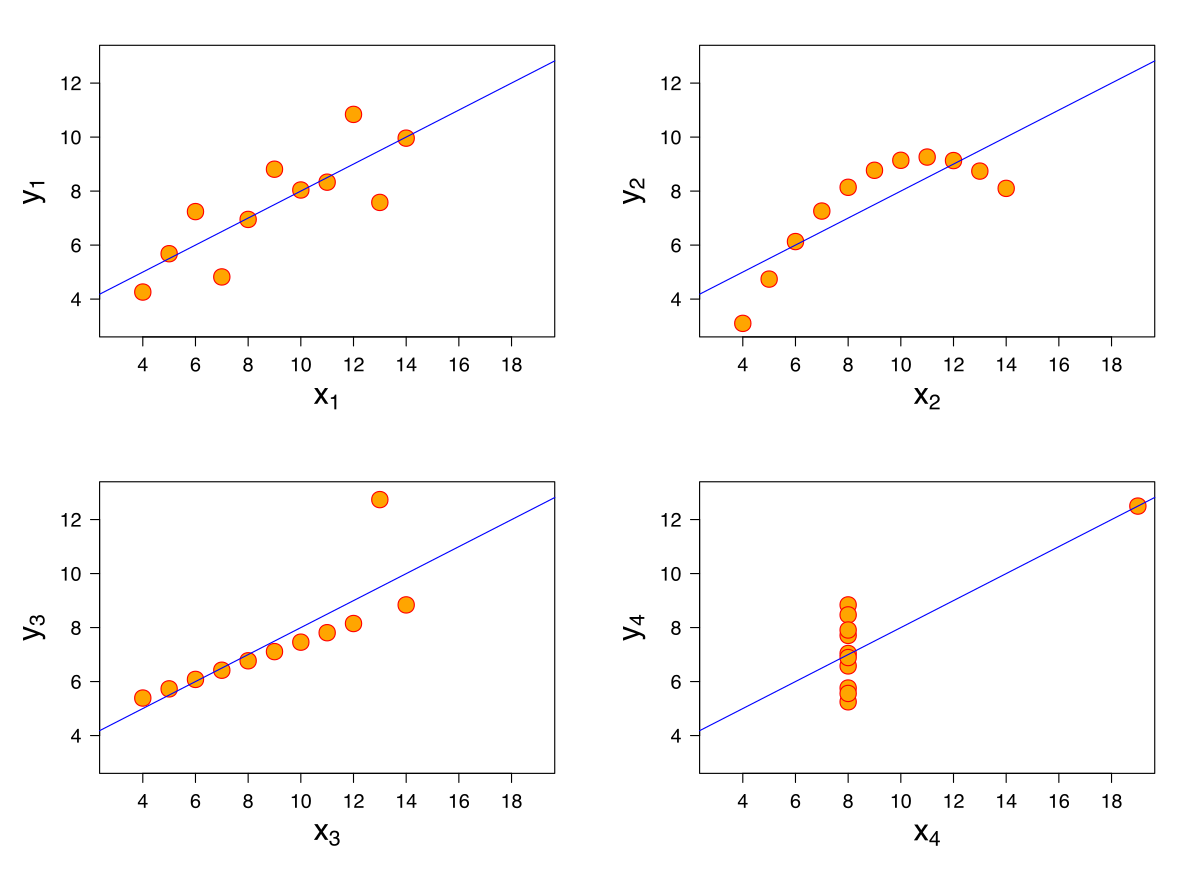

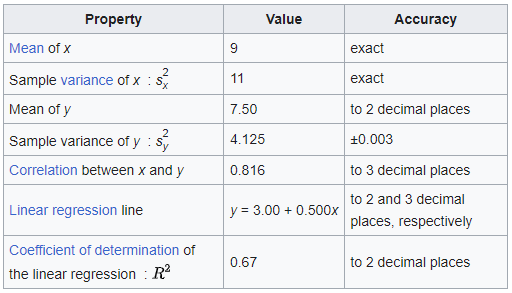

# **Inferencijalna statistika**

U inferencijalnoj statistici fokus je na stvaranju predviđanja o velikoj skupini podataka na temelju reprezentativnog uzorka populacije. Slučajan uzorak podataka uzima se iz populacije kako bi se ona opisala te kako bi se donijeli zaključci o populaciji. Budući da inferencijalna statistika pravi predviđanja, rezultati su često u obliku vjerojatnosti.

Točnost inferencijalne statistike uvelike ovisi o točnosti uzorka i načina na koji on predstavlja populaciju. Rezultati koji se temelje na neslučajnim uzorcima obično se odbacuju. Nasumično uzorkovanje, iako nije uvijek jednostavno, izuzetno je važno za izvođenje ispravnih zaključaka. 

Jednostavan način izvođenja uzorka iz skupa podataka omogućuje funkcija *sample()* iz biblioteke pandas. Pri tome parametar *replace* specificira može li isti redak više puta biti odabran u skup podataka.  

In [ ]:
sample1 = data.sample(n=10, replace=True)
sample2 = data.sample(n=10, replace=False)

In [ ]:
sample1.describe()

In [ ]:
sample2.describe()

## **Kvantificiranje nesigurnosti**

Uzorci podataka uvijek unose nesigurnost. Štoviše, čak i kompletan skup podataka predstavlja uzorak (osim ako ne sadrži baš sve podatke o problemu iz stvarnog svijeta). Kad god se računa inferencijalna statistika za neki skup podataka ili njegov uzorak, dobra praksa jest kvantificirati koliko smo sigurni u nju. Dva poznata načina kvantificiranja nesigurnosti jesu:

1.   Testiranje hipoteza - koristi se za usporedbu cijelih populacija ili za procjenu odnosa između varijabli pomoću uzoraka. Hipoteze ili predviđanja testiraju se pomoću statističkih testova kako bi se izvukli valjani zaključci.
2.   Intervali pouzdanosti - koriste se za promatranje varijabilnosti u statistici. Intervali pouzdanosti uzimaju u obzir nesigurnost i pogrešku uzorkovanja kako bi stvorili raspon vrijednosti unutar kojeg se procjenjuje da će stvarna vrijednost populacije biti. Svaki interval pouzdanosti povezan je s razinom pouzdanosti koja iskazuje vjerojatnost da interval sadrži procjenu vrijednosti parametra ako se studija ponovi.



### **Testiranje hipoteza**

Ideja iza testiranja hipoteza jest dobiti (slabu i indirektnu) podršku za hipotezu $H_A$ (alternativna hipoteza) odbacivanjem hipoteze $H_0$ (nulte hipoteze). Ova podrška se u pravilu izvodi računanjem nekakve testne statistike, odnosno mjere provedene na podacima koja će vjerojatno biti vrlo velika za $H_A$, ali mala za $H_0$. 

Zamislimo, primjerice, postupak bacanja novčića. U jednom eskperimentu, novčić je bačen 10 puta te je 4 puta na gornjoj strani bila "glava". Možemo si postaviti pitanje je li novčić pravedan/ispravan? Ako želimo ispitati ovu (ne)sigurnost testiranjem hipoteza, potrebno je postaviti $H_A$ i $H_0$ hipoteze i ispitati možemo li ih prihvatiti ili odbaciti. Ovaj problem može se i formalno iskazati sljedećim koracima:

1.   Postavljanje hipoteze $H_0$ i $H_A$ - primjerice, $H_0$ = vjerojatnost pojave glave je $0.5$; $H_A$ = vjerojatnost pojave glave je manja od $0.5$
2.   Odabir prikladne testne statistike $s$ - primjerice, $s$ = pojava glave u $n$ bacanja 
3.   Nasumično uzorkovanje skupa podataka i računanje testne statistike
4.   Računanje vjerojatnosti očekivane vrijednosti ili nečega još ekstremnijeg od očekivane vrijednosti testne statistike. Ova vjerojatnost se naziva **$p$-vrijednost (engl. *$p$-value*)**.
5.   Postavljanje pravila odlučivanja: odbaci $H_0$ ako je $p$-vrijednost < $\alpha$, gdje je $\alpha$ razina značajnosti. Razina značajnosti kontrolira lažno pozitivnu stopu (vjerojatnost odbijanja $H_0$ iako je istinita), a odabire ju podatkovni analitičar. 

U ovom primjeru, testna statistika je broj glava u 10 bacanja. Napravili smo eksperiment te smo dobili 4 glave. Dakle, očekivana vrijednost testne statistike jest 4. S obzirom na $H_A$ moramo izračunati vjerojatnost ove testne statistike, ali i vjerojatnost još ekstremnijih događaja (da je broj glava jednak 3, 2, 1 ili 0). Zbrojene vjerojatnosti ovih događaja tako predstavljaju $p$-vrijednost. 

Poznato je da se bacanje novčića može opisati binomijalnom distribucijom: $P_{x} = {n \choose x} p^x q^{n-x}$, gdje je $x$ broj pojavljivanja određenog događaja nakon $n$ ponavljanja, $p$ vjerojatnost pojave tog događaja nakon jednog ponavljanja, a $q$ vjerojatnost da se događaj neće dogoditi u jednom ponavljanju. Za ovaj eksperiment, $n=10$, $p=0.5$ i $q=0.5$ (jer je takva hipoteza $H_0$). 

Tako je $p$-vrijednost = P(4 glave) + P(3 glave) + P(2 glave) + P (1 glava) + P(0 glava). Ubacivanjem ovih vrijednosti za $x$ u gornju formulu, za $p$-vrijednost dobivamo: 0.37695. U praksi često za razinu značajnosti $\alpha$ biramo vrijednosti $0.10$, $0.05$ ili $0.01$. Za sve ove vrijednosti ne možemo odbaciti $H_0$ jer je $p$-vrijednost veća od $\alpha$. Dakle, novčić je pravedan.



#### **Izazovi pri testiranju hipoteza**

Na temelju prikazanog primjera, moguće je istaknuti nekoliko izazova s kojima se suočavamo prilikom testiranja hipoteza:

*  Postavljena hipoteza $H_A$ ima znatan utjecaj na način računanja $p$-vrijednosti. Primjerice, da je u prethodnom primjeru $H_A$=(vjerojatnost pojave glave nije $0.5$), kod računanja $p$-vrijednosti trebali bi uzeti u obzir vjerojatnosti svih događaja ekstremnijih od očekivane vrijednosti testne statistike, odnosno događaja da se glava dogodila 0, 1, 2, 3 ili 4 puta, no također i 6, 7, 8, 9 i 10 puta jer je to jednako "ekstremno" kao i za 0, 1, 2, 3 i 4 puta. Takav statistički test onda se naziva **test s dva repa** (engl. *two-tailed test*) jer se područje odbijanja nalazi u oba repa distribucije vjerojatnosti pojave glava.

* Poželjno je poznavati distribuciju vjerojatnosti testne statistike. U ovom slučaju, testna statistika jest broj pojavljivanja glave kod bacanja novčića, a poznato je u statistici da se njezina distribucija vjerojatnosti može prikazati binomijalnom distribucijom. Dakle, treba biti pažljiv pri odabiru testne statistike.

* Odabir razine značajnosti $\alpha$ uvelike utječe na to hoćemo li odbaciti ili prihvatiti nultu hipotezu. Nju odabire podatkovni znanstvenik za promatrani problem.

* **Odbacivanje nulte hipoteze ne znači nužno prihvaćanje alternativne hipoteze**. Stoga, ako je nulta hipoteza odbačena, potrebni su dodatni testovi da bi se eventualno prihvatila alternativna hipoteza.

#### **Specifični testovi za testiranje hipoteza**


U literaturi postoje brojni statistički testovi koji služe za testiranje specifičnih hipoteza. Ovi testovi se često koriste u znanosti o podacima za usporedbu dviju populacija, procjenu distribucije iz koje podaci potječu, izračun značaja korelacije,... Ako primjerice testiramo hipotezu da nema razlike između dva skupa podataka (npr. ocjene studenata na FERIT-u i FER-u), testna statistika može biti razlika njihovih prosjeka. Ako testiramo je li korelacija između dviju varijabli značajna, testna statistika može biti razlika njihovih medijana.

Iako se ovi testovi razlikuju, osnovna logika je uvijek ista. Na temelju $p$-vrijednosti koje test izračuna, donosimo odluku o odbacivanju ili prihvaćanju nulte hipoteze koju je test pretpostavio. Odabir prikladnog statističkog testa ovisi o više čimbenika:

*  pitanju koje se nastoji odgovoriti,
*  vrsti podataka (jesu li podaci kontinuirani ili kategorički, koja je dimenzionalnost skupa podataka, koji je mogući broj ishoda,...),
*  veličini uzorka,
*  kad uspoređujemo dva uzorka, dolaze li podaci iz istih ili različitih populacija,
*  pretpostavkama o distribuciji testne statistike pod nultom hipotezom.

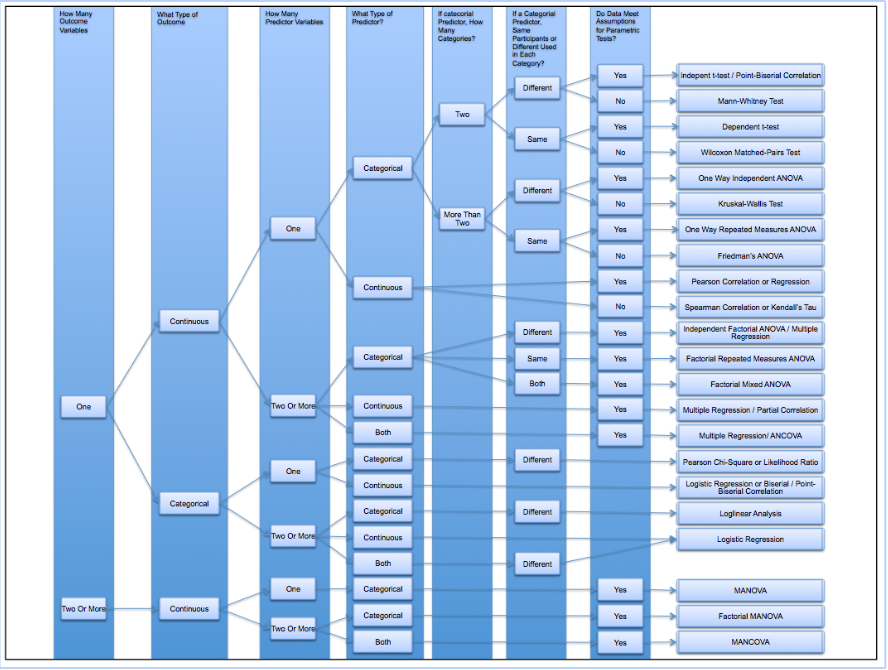

Od prikazanih testova, već smo spomenuli Pearsonov i Spearmanov test korelacije. Uz koeficijent korelacije koji vraćaju, također računaju i $p$-vrijednost koja služi za odbijanje nulte hipoteze. Nulta hipoteza kod ovih testova obično tvrdi da nema korelacije između dviju varijabli. Nadalje, neovisni t-test nultom hipotezom tvrdi da nema razlika u prosjecima dva uzorka pa se stoga često koristi za njihovu usporedbu. Svaki od testova prikazanih na slici ima podrazumijevane nulte i alternativne hipoteze koje služe specifičnoj namjeni. **Većinu ovih testova moguće je pozvati pomoću prikladnih funkcija unutar biblioteke SciPy.** 

### **Intervali pouzdanosti**

Kao što je prije rečeno, intervali pouzdanosti predstavljaju raspon procjena za mjeru od interesa (primjerice, srednja vrijednost) koji se čini razumnim s obzirom na promatrane podatke. Interval pouzdanosti uvijek je povezan s **razinom pouzdanosti**. Analitičari često koriste intervale pouzdanosti koji sadrže ili 95% ili 99% očekivanih opažanja. Dakle, ako je interval pouzdanosti (s razinom pouzdanosti 95%) za neku varijablu od 9.50 do 10.50, moguće je zaključiti da postoji 95% vjerojatnost da stvarna vrijednost pada unutar tog raspona. Intervali pouzdanosti računaju se pomoću statističkih testova (primjerice, t-test).

Zamislimo, primjerice, da proučavamo visine učenika koji treniraju košarku u srednjoj školi. Nasumično smo odabrali uzorak od 40 takvih učenika te izmjerili njihove visine i izračunali da je prosječna veličina 188 cm. Ova vrijednost je samo procjena srednje vrijednosti cijele populacije, jer je dobivena na temelju uzorka, a ne cijele populacije. Iako dobivena vrijednost ima smisla, poželjno je kvantificirati našu (ne)sigurnost u dobivanje ovog broja. 

Intervali pouzdanosti pružaju više informacija od jednostavne procjene srednje vrijednosti uzorka. Utvrđivanjem intervala pouzdanosti od 95% koristeći srednju vrijednost i standardnu devijaciju uzorka **te pretpostavljajući normalnu distribuciju**, dobivamo donju i gornju granicu intervala koji sadrži pravu srednju vrijednost populacije u 95% slučajeva. Uz pretpostavku da prosjeci visina učenika koji treniraju košarku proizlaze iz normalne distribucije, izračun ovih granica postaje jednostavan:

>  **interval pouzdanosti**= **srednja vrijednost uzorka** $\pm$ **granica pogreške**.

Pri tome, granica pogreške se računa kao:

>  **granica pogreške** = $z^*$ $\cdot$ $\frac{\text{standardna devijacija populacije}}{\sqrt{n}}$, 

gdje je $n$ veličina uzorka, a $z^*$ je koeficijent koji odgovara definiranoj razini pouzdanosti, a čita se iz tablice [[5]](https://www.alchemer.com/resources/blog/how-to-calculate-confidence-intervals/) (primjerice, za razinu pouzdanosti od 95%, $z^*=1.96$. Standardnu devijaciju moramo poznavati unaprijed ili ju možemo izračunati na temelju populacije. Pretpostavimo da je za ovaj primjer standardna devijacija populacije 6.5cm. Stoga je granica pogreške jednaka 2 cm, odnosno interval pouzdanosti jest 188 $\pm$ 2cm. Drugim riječima, u 95 nasumično odabranih uzoraka učenika košarkaša ove škole, prosječna visina učenika u uzorku će se nalaziti u intervalu 186 i 190cm. 



#### **Izazovi pri računanju intervala pouzdanosti**

Na temelju prikazanog primjera, moguće je istaknuti nekoliko izazova s kojima se suočavamo prilikom računanja intervala pouzdanosti:

* Uzorak mora biti nasumično odabran. Ponekad nam je dan samo uzorak koji možda nije nasumično odabran, a nemamo pristup populaciji da sami odaberemo nasumično uzorkovanje.
* Ponekad nije poznata standardna devijacija populacije. U tom slučaju, moguće je uzeti standardnu devijaciju uzorka. 
* Mjera od interesa za koju računamo intervale pouzdanosti mora proizlaziti iz normalne distribucije. Za neke mjere ovaj uvjet je teško ispuniti. 

U gornjem pristupu, mjera od interesa za koju smo računali interval pouzdanosti bio je prosjek, odnosno prosječna visina učenika koji treniraju košarku. Prosjek je pogodna mjera od interesa zbog toga što za nju vrijedi **centralni granični teorem** (engl. *central limit theorem*). Centralni granični teorem tvrdi da ako se iz populacije uzme više nasumičnih uzoraka (slučajnim odabirom sa zamjenom) dovoljne veličine (barem da je $n>30$), tada će distribucija srednjih vrijednosti uzoraka biti približno normalno distribuirana. Stoga u gornjem primjeru možemo za prosjek kao mjeru od interesa računati intervale pouzdanosti navedenom formulom.

Intervale pouzdanosti za neki uzorak moguće je izračunati pomoću funkcije *stats.t.interval()* iz biblioteke Scipy. Osim toga, ovi intervali su vizualno prikazani na stupčastim dijagramima koji su nacrtani pomoću biblioteke Seaborn.


In [ ]:
import numpy as np
import scipy.stats as st

grades = [1,1,2,3,1,2,3,4,5,4,5,2,3,4,3,2,1]
st.t.interval(confidence=0.9, df=len(grades)-1, loc=np.mean(grades), scale=st.sem(grades))


## **Određivanje distribucija**

Česta primjena inferencijalne statistike jest određivanje **određivanje distribucije iz koje podaci potječu**. Distribucija podataka jest funkcija koja izlistava sve moguće vrijednosti koje podaci mogu poprimiti. Ona može biti kontinuirana ili diskretna. Nekoliko poznatih standardnih funkcija distribucije daju vjerojatnosti pojave različitih mogućih vrijednosti u podacima. Neke dobro poznate distribucije vjerojatnosti jesu **normalna, Poissonova, eksponencijalna i binomijalna/multinomijalna**.

Prednosti poznavanja distribucije iz koje potječu podaci su sljedeće:

*   Mogućnost određivanja intervala pouzdanosti (engl. confidence interval) - poznavajući temeljnu distribuciju vjerojatnosti, možemo pronaći pripadnu funkciju gustoće vjerojatnosti. To nam pomaže u pripajanju intervala pouzdanosti rasponu vrijednosti koji će podaci vjerojatno poprimiti. Također možemo lako pronaći vjerojatnost pojave ekstremnih vrijednosti.

*   Olakšano praćenje promjene distribucije tijekom vremena - distribucija ima parametre koji se mogu pratiti kako bi se odredilo mijenjaju li podaci distribuciju iz koje potječu.

*   Dobro poznata statistička svojstva - standardne distribucije vjerojatnosti imaju dobro poznata statistička svojstva koje pojednostavljuju posao podatkovnog znanstvenika. Podatke i njihovo ponašanje možemo objasniti sa samo nekoliko parametara.


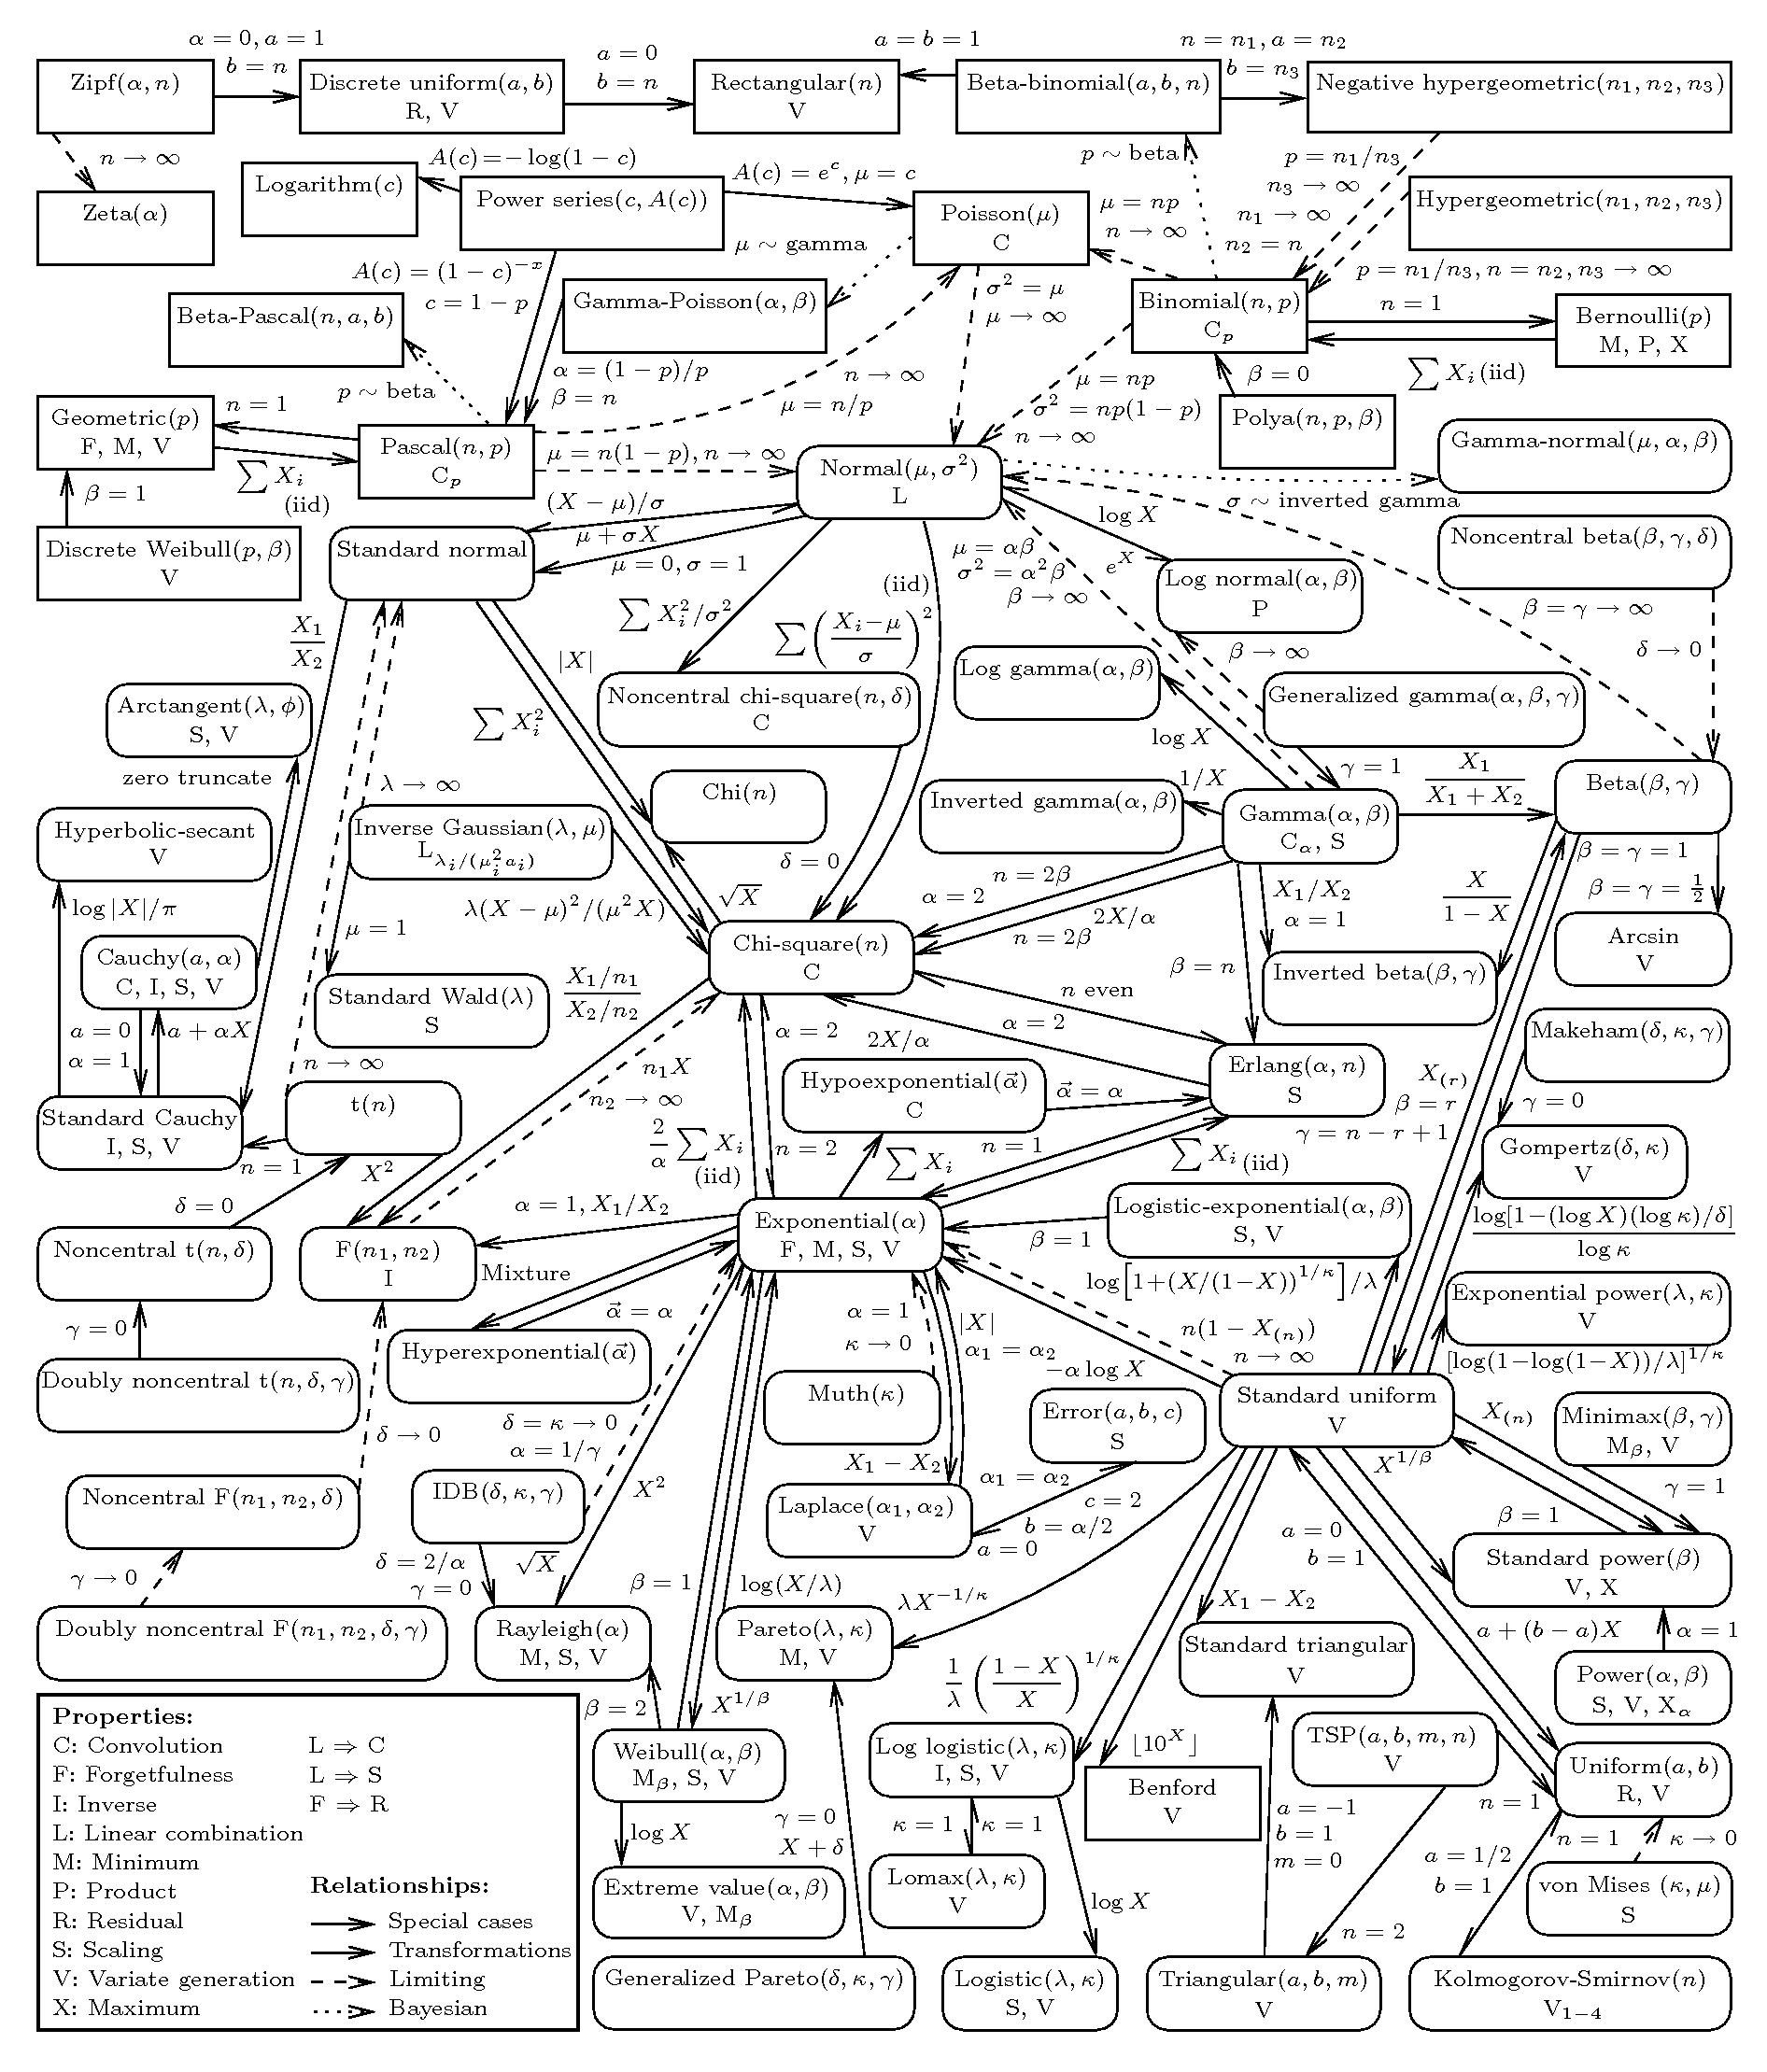


Za prepoznavanje distribucije iz koje podaci potječu mogu se koristiti dijagrami koji vizualno prikazuju distribuciju podataka ili veze između varijabli. Najjednostavniji uvid u izgled distribucije podataka daje nam **histogram**.

In [ ]:
# Učitavanje biblioteka za crtanje
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
plt.hist(data['grade'], bins=4)

In [ ]:
plt.hist(data['age'], bins=8)

Podaci u stvarnom svijetu često ne slijede niti jednu dobro poznatu distribuciju. U ovom slučaju možemo aproksimirati najvjerojatniju distribuciju vjerojatnosti i provjeriti odgovara li podacima. Za jednostavnije provođenje ovog koraka, koristit ćemo biblioteke **statsmodels** i **SciPy**.

Bolji uvid u distribuciju iz koje potječu naši podaci mogu nam pružiti tzv. testovi ponašanja po distribuciji (engl. *goodness-of-fit tests*). Jedan od najpoznatijih takvih testova jest **Kolmogorov-Smirnov test (K-S Test)**. Ovaj test provjerava usklađenost promatrane distribucije s nekom teorijskom distribucijom. Idealan je za male veličine uzorka. Nulta hipoteza pretpostavlja da nema razlike između promatrane i teorijske distribucije, a vrijednost testne statistike $D$ računa se kao:

$$D = Maximum |F_{o}(X) - F_{r}(X)|,$$

gdje je: 
*    $F_o(X)$ opažena kumulativna distribucija učestalosti slučajnog uzorka između *n* 
*   $F_o(X)$ = $k/n$, odnosno (broj opažanja <= $X$) / (ukupan broj opažanja) 
*   $F_r(X)$ - teorijska distribucija frekvencija

Kritična vrijednost $D$ nalazi se u tablicama K-S vrijednosti [[4]](https://www.statisticshowto.com/kolmogorov-smirnov-test/#pvalue) za jedno ispitivanje uzorka. Ako je izračunata vrijednost manja od kritične vrijednosti, nulta hipoteza se prihvaća. U suprotnom se odbacuje. Dobar primjer ručnog provođenja ovog testa možete pronaći u [[4]](https://www.statisticshowto.com/kolmogorov-smirnov-test/#pvalue).

Kolmogorov-Smirnov test moguće je jednostavno provesti pomoću funkcije *kstest_normal()* unutar biblioteke statsmodels. Ova funkcija provjerava potječu li podaci iz normalne (ako je parametar *dist='norm'*) ili eksponencijalne (ako je *dist='exp'*) distribucije. Ovaj test vraća kritičnu vrijednost $D$ i $p$-vrijednost testa. Ako je $p$-vrijednost manja od 0.05, znači da možemo odbaciti nultu hipotezu da podaci potječu iz normalne distribucije. 

In [ ]:
diagnostic.kstest_normal(data['grade'], dist='norm')

In [ ]:
diagnostic.kstest_normal(data['age'], dist='norm')

In [ ]:
data = np.random.randn(15)
plt.hist(data)

In [ ]:

diagnostic.kstest_normal(data, dist='norm')

Ograničenje Kolmogorov-Smirnov testa jest to što je namijenjen za testiranje kontinuiranih distribucija. U gornjem primjeru, dob i spol nisu kontinuirane, nego diskretne varijable.

Još neki od poznatih testova ponašanja po distribuciji jesu Chi-kvadrat test te QQ dijagrami koji su također dostupni u biblioteci SciPy.

# **Sažetak**

U ovoj laboratorijskoj vježbi upoznali smo osnovne tehnike iz područja deskriptivne i inferencijalne statistike. Možemo sažeti naučeno ovim smjernicama:

* Kako bi dobili uvid u skup podataka, možemo izračunati osnovne mjere deskriptivne statistike.
* Moguće je koristiti korelacijske testove (Pearson, Spearman) za kvantificiranje veza između dviju varijabli. 
* Nakon sažetog opisivanja skupa podataka pomoću deskriptive statistike, možemo donositi zaključke ili hipoteze na temelju podataka pomoću inferencijalne statistike.
* Pri donošenju zaključaka i postavljanju hipoteza, potrebno je kvantificirati (ne)sigurnost u njih. To nam omogućuju statistički testovi za testiranje hipoteza te intervali pouzdanosti.
* Česta primjena inferencijalne statistike jest određivanje distribucije iz koje podaci potječu. Možemo proučavati distribuciju vrijednosti neke varijable pomoću histograma i statističkih testova (Kolmogorov-Smirnov test).

# **Literatura**


---

[1] http://jonfwilkins.com/wp-content/uploads/2013/06/BaseImage.png 

[2] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[3] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[4] https://www.statisticshowto.com/kolmogorov-smirnov-test/#pvalue

[5] https://www.alchemer.com/resources/blog/how-to-calculate-confidence-intervals/

[6] https://towardsdatascience.com simpsons-paradox-and-interpreting-data-6a0443516765

[7] https://en.wikipedia.org/wiki/Anscombe%27s_quartet